# Installing required libraries

In [ ]:
!pip install kagglehub
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install sklearn
!pip install statsmodels
!pip install dmba

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 62.3 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
import kagglehub

path = kagglehub.dataset_download("shivachandel/kc-house-data")
print("Path to dataset files:", path)

100%|██████████| 770k/770k [00:00<00:00, 1.68MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shivachandel/kc-house-data/versions/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# show all columns of pandas dataframe
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Creating `housing_df`dataframe with given dataset

In [ ]:
housing_df = pd.read_csv(path + "/kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

Checking the count of rows and columns in dataframe

In [ ]:
housing_df.shape

(21613, 21)

Checking count of null values in `housing_df`

In [ ]:
housing_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


There are **2 null values** in **`sqft_above`** column, from **21,613 rows**, so we decided to drop them, as it won't create significant impact on our analysis.

In [ ]:
# Drop rows where sqft_above is null
housing_df = housing_df.dropna()

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long       

In [ ]:
housing_df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


Count unique values in each column

In [ ]:
housing_df.nunique()

,0
id,21434
date,372
price,4028
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


We only need the date component (without the time) for our modeling, so this format meets our requirements efficiently.

In [ ]:
# Convert the 'date' column to datetime format if it's not already
housing_df['date'] = pd.to_datetime(housing_df['date'])

# Extract the year as an integer
housing_df['date'] = housing_df['date'].dt.year

housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Dropping unnecessary columns

In [ ]:
housing_df = housing_df.drop(['id', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0


# Creating Dummy variables of Categorical variables

In [ ]:
# Define categorical variables
categorical_vars = ['view', 'condition', 'grade']

# Create dummy variables for the entire dataset
housing_df = pd.get_dummies(housing_df, columns=categorical_vars, drop_first=True)

# Convert boolean columns to 0 and 1
for col in housing_df.select_dtypes(include=['bool']).columns:
    housing_df[col] = housing_df[col].astype(int)

housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,2014,221900.0,3,1.00,1180,5650,1.0,0,1180.0,0,1955,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,2170.0,400,1951,1991,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2015,180000.0,2,1.00,770,10000,1.0,0,770.0,0,1933,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,1050.0,910,1965,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,1680.0,0,1987,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# Correlation Matrix

<Axes: >

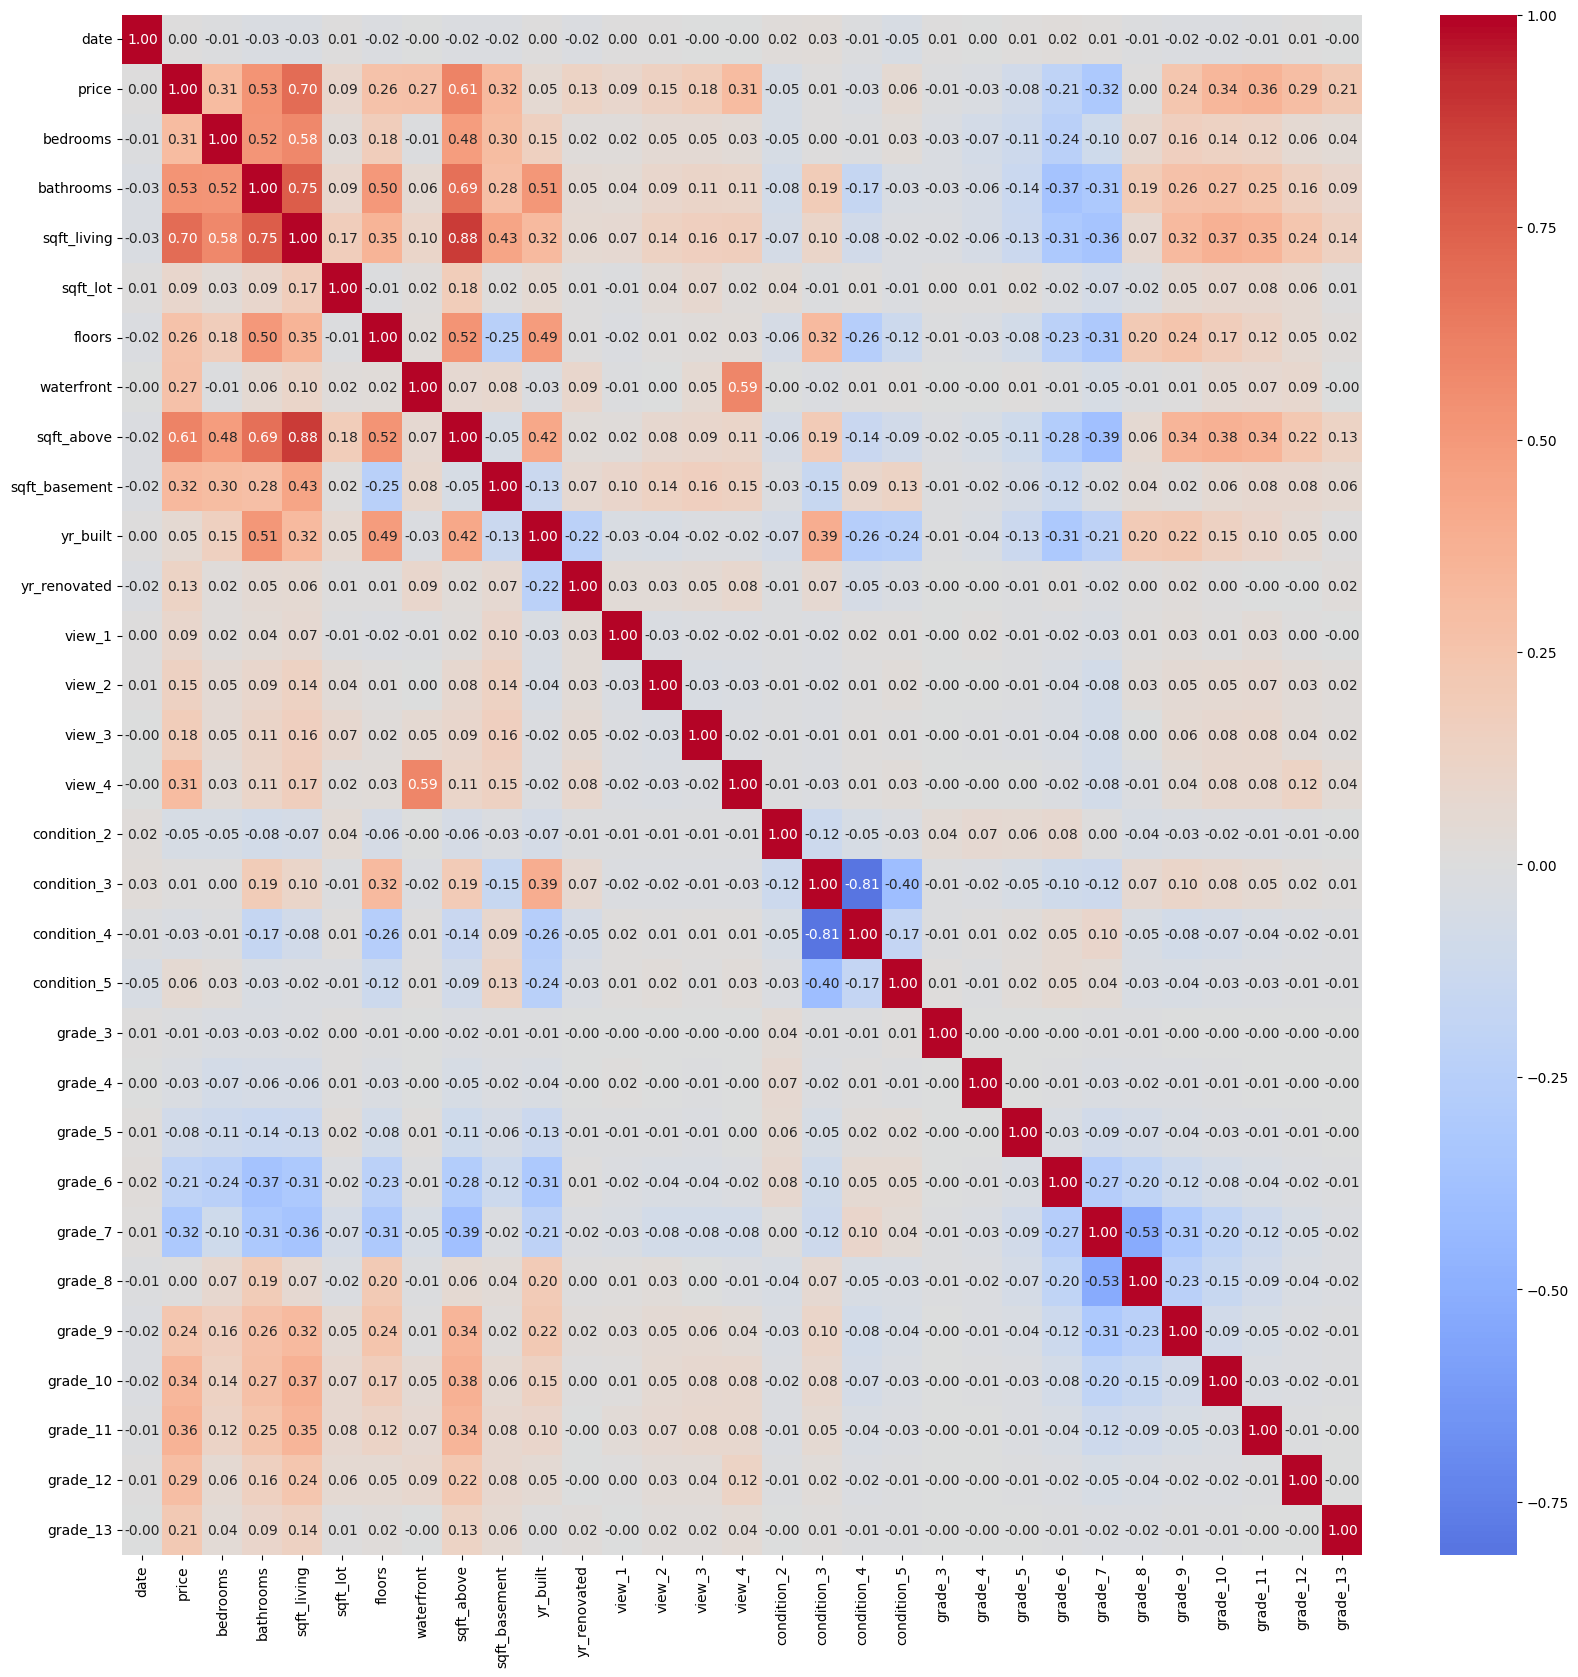

In [ ]:
# Storing correlation values
corr = housing_df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)

## High Multicollinearity

Based on this we will remove `sqft_above` and `bathrooms`

In [ ]:
print("Features with  Multicorrelatinity (<|0.7|):")

high_corr_vars = corr[corr > 0.7].stack().reset_index()
high_corr_vars = high_corr_vars[high_corr_vars['level_0'] != high_corr_vars['level_1']]
high_corr_vars.drop([2, 7, 9], inplace=True)
high_corr_vars

Features with  Multicorrelatinity (<|0.7|):


,level_0,level_1,0
5,bathrooms,sqft_living,0.754684
6,sqft_living,price,0.702055
13,sqft_above,sqft_living,0.876644


### Low (Weak) Correlation with Price

In [ ]:
low_correlation_features = corr[abs(corr["price"]) < 0.25]

print("Features with low correlation (<|0.25|) with price:")
print(low_correlation_features["price"].sort_values())

low_correlation_price_predictors = sorted(low_correlation_features.index.to_list())
print(low_correlation_price_predictors)

Features with low correlation (<|0.25|) with price:
grade_6        -0.209328
grade_5        -0.084512
condition_2    -0.051916
grade_4        -0.032520
condition_4    -0.030696
grade_3        -0.010733
date            0.003549
grade_8         0.004676
condition_3     0.007111
yr_built        0.054006
condition_5     0.057587
sqft_lot        0.089661
view_1          0.092608
yr_renovated    0.126436
view_2          0.148420
view_3          0.182882
grade_13        0.211804
grade_9         0.235903
Name: price, dtype: float64
['condition_2', 'condition_3', 'condition_4', 'condition_5', 'date', 'grade_13', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_8', 'grade_9', 'sqft_lot', 'view_1', 'view_2', 'view_3', 'yr_built', 'yr_renovated']


# Multiple Linear Regression

## Making Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary
from sklearn.metrics import r2_score

# Creating Adj R2
def adjusted_r2_score(y_true, y_pred, model):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)  # Number of observations
    p = model.coef_.size  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2


# Creating AIC Score
def AIC_score(y_true, y_pred, model):
    n = len(y_true)  # Number of observations
    k = model.coef_.size  # Number of predictors
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)  # Residual sum of squares
    aic = n * np.log(rss / n) + 2 * k
    return aic


# Creating Multiple Linear Regression Model as mlp_model()
def mlp_model(p):
    outcome = 'price'
    global X, y, train_X, valid_X, train_y, valid_y

    # Partition data into predictors (x) and output (y)
    X = housing_df[p]
    y = housing_df[outcome]

    # Split the data into training and validation
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.25, random_state=42)

    # Built the Linear Model based on the training data
    model = LinearRegression()
    model.fit(train_X, train_y)

    # Coefficients
    # print(pd.DataFrame({'Predictor': X.columns, 'coefficient': model.coef_}))

    # Evaluate Perfomance
    # Training
    print("\nTraining Performance")
    regressionSummary(train_y, model.predict(train_X))

    # Validation
    print("\nValidation Performance")
    regressionSummary(valid_y, model.predict(valid_X))

    # Adjusted R-squared
    predictions = model.predict(valid_X)
    adj_r2 = adjusted_r2_score(valid_y, predictions, model)
    print("\nAdjusted R-squared:", round(adj_r2, 3))

    # AIC
    aic = AIC_score(valid_y, predictions, model)
    print("\nAIC:", round(aic, 3))

Colab environment detected.


## With All Predictors

In [ ]:
all_predictors = housing_df.columns.to_list()
all_predictors.remove("price")

mlp_model(all_predictors)


Training Performance

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 202280.8542
            Mean Absolute Error (MAE) : 132655.7353
          Mean Percentage Error (MPE) : -9.1571
Mean Absolute Percentage Error (MAPE) : 27.5140

Validation Performance

Regression statistics

                      Mean Error (ME) : 476.1909
       Root Mean Squared Error (RMSE) : 220027.5637
            Mean Absolute Error (MAE) : 138581.6226
          Mean Percentage Error (MPE) : -9.5761
Mean Absolute Percentage Error (MAPE) : 27.8199

Adjusted R-squared: 0.686

AIC: 132990.097


## Forward Selection / SFS (Sequential Forward Selection)

In [ ]:
# Sequential feature selector using a forward selection method on a linear regression model
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(
    estimator=LinearRegression(),
    n_features_to_select=6,  # selecting the number of features
    tol=0.000000001, # Tolerance
    direction='forward',  # Forward selection method
    scoring='r2',
    cv = 10  # Using k-fold cross validation method, selecting 10 as it is one of the standard options
)

# Fit SFS on the training data
sfs = sfs.fit(train_X, train_y)

sfs.get_feature_names_out()

forward_selection_features = list(sfs.get_feature_names_out())
print("Forward Selection Features", forward_selection_features)

Forward Selection Features ['sqft_living', 'yr_built', 'view_4', 'grade_10', 'grade_11', 'grade_12']


## RFE (Recursive Feature Elimination) Selection

In [ ]:
from sklearn.feature_selection import RFE

# Initiate the model
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE to the training data
rfe.fit(train_X, train_y)

# Get the selected features
selected_features_mask = rfe.support_
selected_features = train_X.columns[selected_features_mask]

rfe_selection_features = list(selected_features)
print("RFE Selection Features:", rfe_selection_features)

RFE Selection Features: ['waterfront', 'view_4', 'grade_10', 'grade_11', 'grade_12', 'grade_13']


## Removing all variables according to Correlation Matrix

   
We removed following predictors due to high Multicollinearity (>0.7)  `sqft_above`, `bathrooms`  

In [ ]:
# Assuming 'all_predictors' contains all potential predictors
all_predictors = housing_df.columns.to_list()
all_predictors.remove("price")

p1 = all_predictors.copy()
for var in ['sqft_above', 'bathrooms']:
    if var in p1:
        p1.remove(var)

mlp_model(p1)


Training Performance

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 203272.7990
            Mean Absolute Error (MAE) : 133213.3944
          Mean Percentage Error (MPE) : -9.3151
Mean Absolute Percentage Error (MAPE) : 27.6561

Validation Performance

Regression statistics

                      Mean Error (ME) : 684.1619
       Root Mean Squared Error (RMSE) : 220796.6584
            Mean Absolute Error (MAE) : 139009.6034
          Mean Percentage Error (MPE) : -9.6129
Mean Absolute Percentage Error (MAPE) : 27.8549

Adjusted R-squared: 0.684

AIC: 133023.803


We removed following predictors with less correlation with price (<|0.25|)

In [ ]:
p2 = p1.copy()
for var in low_correlation_price_predictors:
    if var in p2:
        p2.remove(var)

mlp_model(p2)


Training Performance

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 229359.5063
            Mean Absolute Error (MAE) : 154615.6603
          Mean Percentage Error (MPE) : -12.8756
Mean Absolute Percentage Error (MAPE) : 32.6429

Validation Performance

Regression statistics

                      Mean Error (ME) : -190.3963
       Root Mean Squared Error (RMSE) : 247867.8933
            Mean Absolute Error (MAE) : 161000.6194
          Mean Percentage Error (MPE) : -13.5368
Mean Absolute Percentage Error (MAPE) : 33.0295

Adjusted R-squared: 0.603

AIC: 134237.557


Drop three predictors according to thier coefficients

In [ ]:
p3 = p2.copy()
for var in ['sqft_basement', 'floors', 'sqft_living']:
    if var in p3:
        p3.remove(var)

mlp_model(p3)


Training Performance

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 262194.9071
            Mean Absolute Error (MAE) : 176108.8193
          Mean Percentage Error (MPE) : -18.8830
Mean Absolute Percentage Error (MAPE) : 39.5526

Validation Performance

Regression statistics

                      Mean Error (ME) : 3972.9928
       Root Mean Squared Error (RMSE) : 285234.9011
            Mean Absolute Error (MAE) : 183018.3313
          Mean Percentage Error (MPE) : -18.6614
Mean Absolute Percentage Error (MAPE) : 39.7301

Adjusted R-squared: 0.475

AIC: 135748.904


## Comparing models with different features

In [ ]:
print("Forward Selection Features:\n\t", forward_selection_features, end="\n\n")
print("RFE Selection Features:\n\t", rfe_selection_features)

Forward Selection Features:
	 ['sqft_living', 'yr_built', 'view_4', 'grade_10', 'grade_11', 'grade_12']

RFE Selection Features:
	 ['waterfront', 'view_4', 'grade_10', 'grade_11', 'grade_12', 'grade_13']


In [ ]:
print("------------------------------ Predictors using Forward Selection ------------------------------")
mlp_model(forward_selection_features)

print()

print("------------------------------ Predictors using RFE Selection ------------------------------")
mlp_model(rfe_selection_features)

------------------------------ Predictors using Forward Selection ------------------------------

Training Performance

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 227233.9076
            Mean Absolute Error (MAE) : 154377.5965
          Mean Percentage Error (MPE) : -12.7596
Mean Absolute Percentage Error (MAPE) : 33.0455

Validation Performance

Regression statistics

                      Mean Error (ME) : 3.3525
       Root Mean Squared Error (RMSE) : 245419.6910
            Mean Absolute Error (MAE) : 160577.0999
          Mean Percentage Error (MPE) : -13.3251
Mean Absolute Percentage Error (MAPE) : 33.2943

Adjusted R-squared: 0.611

AIC: 134122.295

------------------------------ Predictors using RFE Selection ------------------------------

Training Performance

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 269832.5291
            Mean Absolute Er

# Predicting house prices

Make House Prediction dataset

In [ ]:
house_prediction_data = [
    ['sqft_living', 'yr_built', 'view_4', 'grade_10', 'grade_11', 'grade_12'],
    [2000, 2000, 1, 0, 0, 1],
    [2500, 2015, 1, 1, 0, 0]
]

# Create the DataFrame, using the first row as header
house_prediction_df = pd.DataFrame(house_prediction_data[1:], columns=house_prediction_data[0])


Making new model with only Forward Selection best Features

In [ ]:
def best_model(features):
    outcome = 'price'
    global X, y, train_X, valid_X, train_y, valid_y

    # Partition data into predictors (x) and output (y)
    X = housing_df[features]
    y = housing_df[outcome]

    # Split the data into training and validation
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.25, random_state=42)

    # Built the Linear Model based on the training data
    best_model = LinearRegression()
    best_model.fit(train_X, train_y)

    # Evaluate Perfomance
    # Training
    print("\nTraining Performance")
    regressionSummary(train_y, best_model.predict(train_X))

    # Validation
    print("\nValidation Performance")
    regressionSummary(valid_y, best_model.predict(valid_X))

    # Adjusted R-squared
    predictions = best_model.predict(valid_X)
    adj_r2 = adjusted_r2_score(valid_y, predictions, best_model)
    print("\nAdjusted R-squared:", round(adj_r2, 3))

    # AIC
    aic = AIC_score(valid_y, predictions, best_model)
    print("\nAIC:", round(aic, 3))

    # Return the trained best_model object
    return best_model

In [ ]:
# Get the fitted model using best_model and forward_selection_features
best_model_forward = best_model(forward_selection_features)

# Make predictions on house_prediction_df using best_model_forward
predictions_best_model = best_model_forward.predict(house_prediction_df[forward_selection_features])

# Create a DataFrame for display
results_df = house_prediction_df.copy()
results_df['Predicted Price'] = predictions_best_model

# Format the 'Predicted Price' column
results_df['Predicted Price'] = results_df['Predicted Price'].apply(lambda x: "${:,.2f}".format(x))

# Print the results in a formatted table
print("\nPredicted prices using best_model (Forward Selection):")
print(results_df.to_string())


Training Performance

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 227233.9076
            Mean Absolute Error (MAE) : 154377.5965
          Mean Percentage Error (MPE) : -12.7596
Mean Absolute Percentage Error (MAPE) : 33.0455

Validation Performance

Regression statistics

                      Mean Error (ME) : 3.3525
       Root Mean Squared Error (RMSE) : 245419.6910
            Mean Absolute Error (MAE) : 160577.0999
          Mean Percentage Error (MPE) : -13.3251
Mean Absolute Percentage Error (MAPE) : 33.2943

Adjusted R-squared: 0.611

AIC: 134122.295

Predicted prices using best_model (Forward Selection):
   sqft_living  yr_built  view_4  grade_10  grade_11  grade_12 Predicted Price
0         2000      2000       1         0         0         1   $1,751,767.26
1         2500      2015       1         1         0         0   $1,232,334.48


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def knn_model(k):
    X = housing_df[forward_selection_features]
    y = housing_df['price']

    # Split data into training and testing sets
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale features using StandardScaler
    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    valid_X = scaler.transform(valid_X)

    # Create and train a KNeighborsRegressor model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_X, train_y)

    # Make predictions on the testing set
    y_pred = knn_model.predict(valid_X)

    # Evaluate the model
    mse = mean_squared_error(valid_y, y_pred)
    r2 = r2_score(valid_y, y_pred)
    rmse = np.sqrt(mse)

    print("KNN Model Evaluation (k="+str(k)+"):")
    print(f"Mean Squared Error: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")

    # Scale the new house data
    house_prediction_df_scaled = scaler.transform(house_prediction_df[forward_selection_features])

    # Make predictions on the new houses
    predictions_knn = knn_model.predict(house_prediction_df_scaled)

    # Create a DataFrame for display
    results_knn_df = house_prediction_df.copy()
    results_knn_df['Predicted Price (KNN)'] = predictions_knn

    # Format the 'Predicted Price (KNN)' column
    results_knn_df['Predicted Price (KNN)'] = results_knn_df[
        'Predicted Price (KNN)'].apply(lambda x: "${:,.2f}".format(x))

    # Print the results
    print("\nPredicted prices using KNN(k="+str(k)+"):")
    print(results_knn_df.to_string())

In [ ]:
knn_model(5)

KNN Model Evaluation (k=5):
Mean Squared Error: 65961466111.55175
RMSE: 256829.6441448139
R-squared: 0.5748221492354435

Predicted prices using KNN(k=5):
   sqft_living  yr_built  view_4  grade_10  grade_11  grade_12 Predicted Price (KNN)
0         2000      2000       1         0         0         1         $2,461,050.00
1         2500      2015       1         1         0         0         $1,626,600.00


In [ ]:
knn_model(10)

KNN Model Evaluation (k=10):
Mean Squared Error: 62364218782.15806
RMSE: 249728.2899115718
R-squared: 0.5980094732648027

Predicted prices using KNN(k=10):
   sqft_living  yr_built  view_4  grade_10  grade_11  grade_12 Predicted Price (KNN)
0         2000      2000       1         0         0         1         $2,652,575.00
1         2500      2015       1         1         0         0         $1,347,860.00


In [ ]:
print('''
Validation Performance of Best Model (Forward Selection):
Mean Squared Error: 60230824752.919
RMSE: 245421.09
R-squared: 0.612''')

print('''
KNN Model Evaluation (k=5):
Mean Squared Error: 65961466111.552
RMSE: 256829.644
R-squared: 0.575''')

print('''
KNN Model Evaluation (k=10):
Mean Squared Error: 62364218782.158
RMSE: 249728.290
R-squared: 0.598''')




Validation Performance of Best Model (Forward Selection):
Mean Squared Error: 60230824752.919
RMSE: 245421.09
R-squared: 0.612

KNN Model Evaluation (k=5):
Mean Squared Error: 65961466111.552
RMSE: 256829.644
R-squared: 0.575

KNN Model Evaluation (k=10):
Mean Squared Error: 62364218782.158
RMSE: 249728.290
R-squared: 0.598


So Multiple Linear Regression Model (best_model() or Model with Forward selection Features) is best because it has,
1.  Lowest MSE of **60,230,824,752.919**
2.  Highest R-squared of **0.612**

as compared to other KNN models.

# Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Creating Random Forest Regressor Model
def rfg_model(features):
    X = housing_df[features]
    y = housing_df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    rf_regressor = RandomForestRegressor(n_estimators=180, random_state=42)
    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Random Forest Regressor Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"RMSE: {rmse}")

    return rf_regressor

In [ ]:
rf_regressor = rfg_model(forward_selection_features)

Random Forest Regressor Evaluation:
Mean Squared Error: 62169991578.20673
R-squared: 0.5992614330832272
RMSE: 249339.10960418292


In [ ]:
predictions_rf = rf_regressor.predict(house_prediction_df[forward_selection_features])

results_rf_df = house_prediction_df.copy()
results_rf_df['Predicted Price'] = predictions_rf

# Format the 'Predicted Price' column
results_rf_df['Predicted Price'] = results_rf_df['Predicted Price'].apply(lambda x: "${:,.2f}".format(x))

print("\nPredicted prices using Random Forest Regressor:")
print(results_rf_df.to_string())


Predicted prices using Random Forest Regressor:
   sqft_living  yr_built  view_4  grade_10  grade_11  grade_12 Predicted Price
0         2000      2000       1         0         0         1     $786,719.38
1         2500      2015       1         1         0         0   $1,619,212.59


In [ ]:
# Assuming 'rf_regressor' is your fitted RandomForestRegressor model
importances = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': forward_selection_features,  # Your selected features
    'Importance (%)': importances
})

# Sort by importance (%) in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance (%)', ascending=False)
feature_importances_df["Importance (%)"] = feature_importances_df["Importance (%)"]*100
feature_importances_df["Importance (%)"] = feature_importances_df["Importance (%)"].apply(lambda x: round(x, 2))

feature_importances_df

,Feature,Importance (%)
0,sqft_living,71.70
1,yr_built,19.65
2,view_4,3.89
3,grade_10,2.22
4,grade_11,1.58
5,grade_12,0.97


# Model Performance Comparisons using Bar Graph

<ipython-input-37-b2b3ca51527a>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-37-b2b3ca51527a>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
<ipython-input-37-b2b3ca51527a>:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')


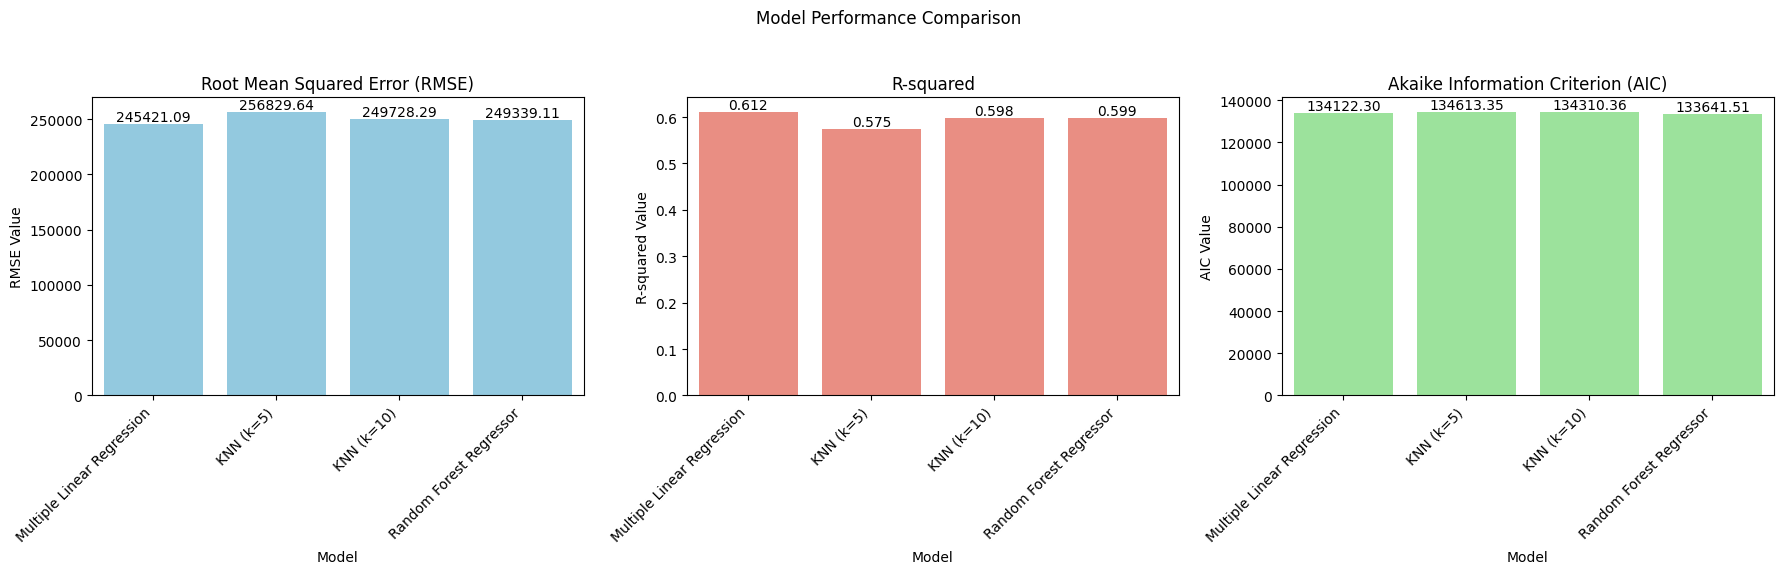

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Defining the data
results_df = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'KNN (k=5)', 'KNN (k=10)', 'Random Forest Regressor'],
    'RMSE': [245421.09, 256829.64, 249728.29, 249339.11],
    'R-squared': [0.612, 0.575, 0.598, 0.599],
    'AIC': [134122.295, 134613.354, 134310.359, 133641.506]
})

# Creating the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Performance Comparison')

# Plotting RMSE
ax = sns.barplot(x='Model', y='RMSE', data=results_df, ax=axs[0], color='skyblue')
axs[0].set_title('Root Mean Squared Error (RMSE)')
axs[0].set_ylabel('RMSE Value')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Data labels for RMSE
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, '{:.2f}'.format(height), ha="center", va="bottom")

# Plot R-squared
ax = sns.barplot(x='Model', y='R-squared', data=results_df, ax=axs[1], color='salmon')
axs[1].set_title('R-squared')
axs[1].set_ylabel('R-squared Value')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Data labels for R-squared
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, '{:.3f}'.format(height), ha="center", va="bottom")  # Format to 3 decimal places

# Plot AIC
ax = sns.barplot(x='Model', y='AIC', data=results_df, ax=axs[2], color='lightgreen')
axs[2].set_title('Akaike Information Criterion (AIC)')
axs[2].set_ylabel('AIC Value')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Data labels for AIC
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, '{:.2f}'.format(height), ha="center", va="bottom")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()